In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.spatial import distance
filename = "datasets/heart.csv"
CLASSES = 5

In [2]:
def minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        if i == len(dataset[0]) - 1:
            continue
        value_min = dataset[:, i].min()
        value_max = dataset[:, i].max()
        minmax.append([value_min, value_max])
    return minmax

In [3]:
def normalize(_dataset, min_max):
    for row in _dataset:
        for i in range(len(row)):
            if i == len(row) - 1:  # exclude labels
                continue
            dif = min_max[i][1] - min_max[i][0]
            row[i] = ((row[i] - min_max[i][0]) / dif) if dif != 0 else 0
    return _dataset

In [4]:
def draw_plot(dataset, feature1N, feature2N, target):
    iris_type_to_color = {
        1.0 : "g",
        2.0 : "b",
        3.0 : "y",
        4.0 : "m",
        5.0 : "c"
    }

    colored_irises = list(map(lambda x: iris_type_to_color[x], dataset[:, -1]))
    colored_irises.append("r")

    x = list(dataset[:, feature1N])
    y = list(dataset[:, feature2N])

    x.append(target[feature1N])
    y.append(target[feature2N])

    plt.scatter(x, y, c=colored_irises)
    plt.show()


In [5]:
dataset = pd.read_csv(filename, dtype=np.float64)

In [6]:
pd.DataFrame(dataset.values)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,32.0,1.0,1.0,6.0,1.0,2.0,7.0,2.0,20.0,2.0,1.0,1.0,2.0
1,34.0,1.0,4.0,9.0,1.0,1.0,29.0,2.0,2.0,2.0,1.0,1.0,2.0
2,35.0,1.0,4.0,1.0,1.0,2.0,9.0,3.0,1.0,1.0,1.0,4.0,4.0
3,36.0,1.0,4.0,8.0,1.0,2.0,5.0,3.0,16.0,3.0,1.0,3.0,2.0
4,38.0,0.0,4.0,7.0,1.0,2.0,35.0,2.0,10.0,2.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,9.0,2.0,3.0,55.0,3.0,4.0,3.0,1.0,4.0,2.0
119,70.0,1.0,4.0,12.0,3.0,2.0,32.0,3.0,35.0,3.0,1.0,4.0,4.0
120,72.0,1.0,3.0,18.0,1.0,4.0,12.0,2.0,32.0,3.0,3.0,1.0,1.0
121,73.0,0.0,3.0,18.0,2.0,3.0,67.0,2.0,4.0,2.0,1.0,2.0,2.0


In [7]:
min_max = minmax(dataset.values)
normalized_dataset_values = normalize(dataset.values.copy(), min_max)
pd.DataFrame(normalized_dataset_values)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,1.0,0.000000,0.25,0.0,0.333333,0.089552,0.5,0.542857,0.333333,0.0,0.000000,2.0
1,0.047619,1.0,1.000000,0.40,0.0,0.000000,0.417910,0.5,0.028571,0.333333,0.0,0.000000,2.0
2,0.071429,1.0,1.000000,0.00,0.0,0.333333,0.119403,1.0,0.000000,0.000000,0.0,1.000000,4.0
3,0.095238,1.0,1.000000,0.35,0.0,0.333333,0.059701,1.0,0.428571,0.666667,0.0,0.666667,2.0
4,0.142857,0.0,1.000000,0.30,0.0,0.333333,0.507463,0.5,0.257143,0.333333,0.0,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.904762,1.0,1.000000,0.40,0.5,0.666667,0.805970,1.0,0.085714,0.666667,0.0,1.000000,2.0
119,0.904762,1.0,1.000000,0.55,1.0,0.333333,0.462687,1.0,0.971429,0.666667,0.0,1.000000,4.0
120,0.952381,1.0,0.666667,0.85,0.0,1.000000,0.164179,0.5,0.885714,0.666667,1.0,0.000000,1.0
121,0.976190,0.0,0.666667,0.85,0.5,0.666667,0.985075,0.5,0.085714,0.333333,0.0,0.333333,2.0


In [8]:
def kNN(dataset, distf, target, k):
    distances = list()
    for row in dataset:
        dist = distf(target, row[:-1])
        distances.append((row, dist))
    distances.sort(key=lambda tup: tup[1])
    
#     neighbors = list()
#     for i in range(k):
#         neighbors.append(distances[i][0])
    return distances[-1][1]

In [9]:
def NWreg(dataset, x, dist, kernel, H, variable=False, onehot=False, lables=None):
    up = 0
    gr = 0
    if variable:
        H = kNN(dataset, dist, x, H)
    for idx, row in enumerate(dataset):
        up += row[-1] * kernel(dist(row[:-1], x) / H)
        if onehot and lables is not None:
            up += lables[idx] * kernel(dist(row[:-1], x) / H)
        gr += kernel(dist(row[:-1], x)/H)
    return up / gr if gr != 0 else 0

In [10]:
def F_macro(CM):
    TP = []
    FP = []
    FN = []
    F_micro = 0
    F_macro = 0

    All = sum(list(sum(e) for e in zip(*CM)))
    
    def Prec(c):
        _gr = TP[c] + FP[c]
        return TP[c] / _gr if _gr != 0 else 0

    def Recall(c):
        _gr = TP[c] + FN[c]
        return TP[c] / _gr if _gr != 0 else 0

    def F_score(c, b=1):
        _prec = Prec(c)
        _recall = Recall(c)
        if _prec != 0 and _recall != 0:
            return (1 + pow(b, 2)) * _prec * _recall / (pow(b, 2) * _prec + _recall)
        else:
            return 0

    def PrecW():
        _sum = 0
        for i in range(CLASSES):
            P = sum(list(e[i] for e in CM))
            _sum += CM[i][i] * sum(CM[i]) / P if P != 0 else 0
        return _sum / All

    def RecallW():
        return sum(CM[i][i] for i in range(CLASSES)) / All

    for i in range(CLASSES):
        tp = CM[i][i]
        TP.append(tp)
        FN.append(sum(CM[i]) - tp)
        FP.append(sum(list(e[i] for e in CM)) - tp)
        F_micro += (sum(CM[i]) * F_score(i)) / All

    return 2 * PrecW() * RecallW() / (PrecW() + RecallW())


In [11]:
euclidean = distance.euclidean
manhattan = distance.cityblock
chebyshev = distance.chebyshev

distances = [euclidean, manhattan, chebyshev]

In [12]:
def epanechnikov(u):
    return 3 * (1 - pow(u, 2)) / 4 if u < 1 else 0
def uniform(u):
    return 0.5 if u < 1 else 0
def triangular(u):
    return 1 - abs(u) if u < 1 else 0
def quartic(u):
    return 15*pow(1-pow(u,2), 2) / 16 if u < 1 else 0
def triweight(u):
    return 35*pow(1-pow(u,2), 3) / 32 if u < 1 else 0
def tricube(u):
    return 70*pow(1-pow(abs(u),3), 3) / 81 if u < 1 else 0
def gaussian(u):
    return math.exp(-pow(u,2) / 2) / math.sqrt(2*math.pi)
def cosine(u):
    return (math.pi * math.cos((math.pi * u) / 2)) / 4 if u < 1 else 0
def logistic(u):
    return 1 / (math.exp(u) + 2 + math.exp(-u))
def sigmoid(u):
    return 2 / (math.pi * (math.exp(u) + math.exp(-u)))

kernels = [epanechnikov, uniform, triangular, quartic, triweight, tricube, gaussian, cosine, logistic, sigmoid]

In [25]:
def regression(dataset):
    maxfscore = 0
    best = []
    bestCM = np.zeros((CLASSES, CLASSES))
    for kernel in kernels:
        for distance in distances:
            for is_variable in [False, True]:
                if is_variable:
                    windows = [x for x in range(2, 25)]
                else:
                    windows = [x * 0.1 for x in range(40, 250)]
                for window in windows:
                    CM = np.zeros((CLASSES, CLASSES))
                    for i in range(len(dataset.values)):
                        curr_dataset = [row for idx, row in enumerate(dataset.values) if idx != i]
                        res = NWreg(curr_dataset, dataset.values[i][:-1],
                                    distance, kernel, window, is_variable)
                        predicted = round(res) if res >= 0.5 else 1
                        expected = round(dataset.values[i][-1])
                        CM[predicted-1][expected-1] += 1
                    fscore = F_macro(CM)
                    if fscore > maxfscore:
                        maxfscore = fscore
                        best = [kernel, distance, window, is_variable]
                        bestCM = CM
    print(str(best))
    print(pd.DataFrame(bestCM))
    print("F score: " + maxfscore.__str__())
    return best, bestCM, maxfscore

In [26]:
best, cm, fsc = regression(dataset)

[<function logistic at 0x7f4b964d3820>, <function cityblock at 0x7f4b96d2aa60>, 6.5, False]
     0     1     2     3    4
0  0.0   0.0   0.0   0.0  0.0
1  2.0   9.0   3.0   2.0  1.0
2  6.0  38.0  29.0  25.0  4.0
3  0.0   1.0   0.0   3.0  0.0
4  0.0   0.0   0.0   0.0  0.0
F score: 0.4671896855804902


In [13]:
onehot = pd.get_dummies(normalized_dataset_values[:,-1])
onehot

,1.0,2.0,3.0,4.0,5.0
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
118,0,1,0,0,0
119,0,0,0,1,0
120,1,0,0,0,0
121,0,1,0,0,0


In [14]:
def regression(dataset, onehot): # for onehot
    maxfscore = 0
    best = []
    bestCM = np.zeros((CLASSES, CLASSES))
    for kernel in kernels:
        for distance in distances:
            for is_variable in [False, True]:
                if is_variable:
                    windows = [x for x in range(2, 25)]
                else:
                    windows = [x * 0.1 for x in range(40, 250)]
                for window in windows:
                    CM = np.zeros((CLASSES, CLASSES))
                    for i in range(len(dataset.values)):
                        curr_dataset = [row for idx, row in enumerate(dataset.values) if idx != i]
                        res = NWreg(curr_dataset, dataset.values[i][:-1],
                                    distance, kernel, window, variable=is_variable, onehot=True, lables=onehot)
                        predicted = np.where(res == max(res))[0][0]
                        expected = round(dataset.values[i][-1])
                        CM[predicted][expected-1] += 1
                    fscore = F_macro(CM)
                    if fscore > maxfscore:
                        maxfscore = fscore
                        best = [kernel, distance, window, is_valiable]
                        bestCM = CM
    print(str(best))
    print(pd.DataFrame(bestCM))
    print("F score: " + maxfscore.__str__())
    return best, bestCM, maxfscore

In [15]:
best1h, cm1h, fsc1h = regression(dataset, onehot.values)

TypeError: &#39;int&#39; object is not iterable

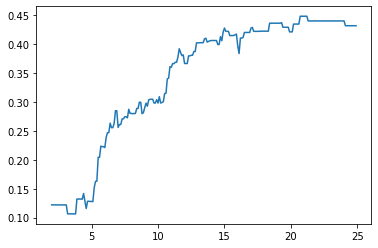

In [120]:
def plot1(dataset):
    fscs = []
    winsize = []
    windows = [x * 0.1 for x in range(20, 250)]
    for window in windows:
        CM = np.zeros((CLASSES, CLASSES))
        for i in range(len(dataset.values)):
            curr_dataset = [row for idx, row in enumerate(dataset.values) if idx != i]
            res = NWreg(curr_dataset, dataset.values[i][:-1], euclidean, epanechnikov, window)
            predicted = round(res) if res >= 0.5 else 1
            expected = round(dataset.values[i][-1])
            CM[predicted-1][expected-1] += 1
        fscs.append(F_macro(CM))
        winsize.append(window)
    plt.plot(winsize, fscs)
plot1(dataset)